# Capítulo 10 - Manipulação de dados com Pandas

## 1. Pandas

In [18]:
import pandas as pd

### Manipulando dados em dataframes do Pandas

In [19]:
# Cria um dicionário

dados = {'Estado': ['Santa Catarina','Rio de Janeiro','Tocantins','Bahia','Minas Gerais'],
         'Ano': [2004, 2005, 2006, 2007, 2008],
         'Taxa Desemprego': [1.5, 1.7, 1.6, 2.4, 2.7]}

In [20]:
print(dados)

{'Estado': ['Santa Catarina', 'Rio de Janeiro', 'Tocantins', 'Bahia', 'Minas Gerais'], 'Ano': [2004, 2005, 2006, 2007, 2008], 'Taxa Desemprego': [1.5, 1.7, 1.6, 2.4, 2.7]}


In [21]:
# Importar função DataFrame do pandas
from pandas import DataFrame

In [22]:
# Converter o dicionário em dataframe

df = DataFrame(dados)

In [23]:
# Exibir primeiras 5 linhas do dataframe
df.head()

,Estado,Ano,Taxa Desemprego
0,Santa Catarina,2004,1.5
1,Rio de Janeiro,2005,1.7
2,Tocantins,2006,1.6
3,Bahia,2007,2.4
4,Minas Gerais,2008,2.7


In [24]:
type(df)

pandas.core.frame.DataFrame

In [25]:
# Reorganizando as colunas
DataFrame(dados, columns = ['Estado','Taxa Desemprego','Ano'])

,Estado,Taxa Desemprego,Ano
0,Santa Catarina,1.5,2004
1,Rio de Janeiro,1.7,2005
2,Tocantins,1.6,2006
3,Bahia,2.4,2007
4,Minas Gerais,2.7,2008


In [26]:
# Criar outro dataframe, com os mesmos dados anteriores, mas adicionando uma coluna e mudando o index
# Note que a coluna criada ficou com valores NaN (valor ausente), pois não há dados na fonte

df2 = DataFrame(dados,columns = ['Estado','Taxa Desemprego', 'Taxa Crescimento', 'Ano'],
                index = ['estado1','estado2','estado3','estado4','estado5'])

ATENÇÃO: valor ausente é ausência de informação, não diferença de dado.

O valor ausente pode ser um NaN (ausência de dado), ou uma "?". Nesse caso, temos o dado (?), mas ela não é uma informação sobre uma taxa de crescimento.

In [27]:
df2

,Estado,Taxa Desemprego,Taxa Crescimento,Ano
estado1,Santa Catarina,1.5,NaN,2004
estado2,Rio de Janeiro,1.7,NaN,2005
estado3,Tocantins,1.6,NaN,2006
estado4,Bahia,2.4,NaN,2007
estado5,Minas Gerais,2.7,NaN,2008


In [28]:
# Retornar valores do data frame

df2.values

array([['Santa Catarina', 1.5, nan, 2004],
       ['Rio de Janeiro', 1.7, nan, 2005],
       ['Tocantins', 1.6, nan, 2006],
       ['Bahia', 2.4, nan, 2007],
       ['Minas Gerais', 2.7, nan, 2008]], dtype=object)

In [29]:
# Retornar tipos de dados do dataframe
# Note que o tipo de `Taxa Crescimento` não foi detectado pelo Pandas, 
# então ele colocou como object (string)


df2.dtypes

Estado               object
Taxa Desemprego     float64
Taxa Crescimento     object
Ano                   int64
dtype: object

In [30]:
# Listar colunas do conjunto de dados
# "dtype: object" se refere ao fato de que o retorno do método é uma string (object)

df2.columns

Index(['Estado', 'Taxa Desemprego', 'Taxa Crescimento', 'Ano'], dtype='object')

In [31]:
# É possível usar o nome de coluna para fatiar o data frame
# Por exemplo, retornar os dados de apenas uma coluna:

df2['Estado']

estado1    Santa Catarina
estado2    Rio de Janeiro
estado3         Tocantins
estado4             Bahia
estado5      Minas Gerais
Name: Estado, dtype: object

In [32]:
# Note que a linguagem Python é case sensitive:

#df2['estado']

In [33]:
# Para filtrar por duas colunas do dataframe, é preciso usar dois abre e fecha colchetes
# Isso porque passamos uma lista como parâmetro (um par de colchetes para introduzir a o parâmetro
# e outro porque ele será passado como lista)

df2[['Taxa Desemprego','Ano']]

,Taxa Desemprego,Ano
estado1,1.5,2004
estado2,1.7,2005
estado3,1.6,2006
estado4,2.4,2007
estado5,2.7,2008


In [34]:
# Exibir índices do df 

df2.index

Index(['estado1', 'estado2', 'estado3', 'estado4', 'estado5'], dtype='object')

In [35]:
# Filtrar df pelo índice
# axis = 0 indica que vc vai pegar a linha

df2.filter(items = ['estado3'], axis = 0)

,Estado,Taxa Desemprego,Taxa Crescimento,Ano
estado3,Tocantins,1.6,NaN,2006


### Usando NumPy e Pandas para manipulação de dados

In [36]:
df2.head()

,Estado,Taxa Desemprego,Taxa Crescimento,Ano
estado1,Santa Catarina,1.5,NaN,2004
estado2,Rio de Janeiro,1.7,NaN,2005
estado3,Tocantins,1.6,NaN,2006
estado4,Bahia,2.4,NaN,2007
estado5,Minas Gerais,2.7,NaN,2008


In [37]:
df2.dtypes

Estado               object
Taxa Desemprego     float64
Taxa Crescimento     object
Ano                   int64
dtype: object

In [38]:
# Resumo estatístico do Dataframe
# Note que o Python só inclui as colunas que estão com valor numérico

df2.describe()

,Taxa Desemprego,Ano
count,5.000000,5.000000
mean,1.980000,2006.000000
std,0.535724,1.581139
min,1.500000,2004.000000
25%,1.600000,2005.000000
50%,1.700000,2006.000000
75%,2.400000,2007.000000
max,2.700000,2008.000000


In [39]:
# Verificar se tem valor na (not available) no dataframe

df2.isna()

,Estado,Taxa Desemprego,Taxa Crescimento,Ano
estado1,False,False,True,False
estado2,False,False,True,False
estado3,False,False,True,False
estado4,False,False,True,False
estado5,False,False,True,False


In [40]:
import numpy as np

In [41]:
# Preencher a coluna Taxa Crescimento com o NumPy

df2['Taxa Crescimento'] = np.arange(5.)

In [42]:
df2

,Estado,Taxa Desemprego,Taxa Crescimento,Ano
estado1,Santa Catarina,1.5,0.0,2004
estado2,Rio de Janeiro,1.7,1.0,2005
estado3,Tocantins,1.6,2.0,2006
estado4,Bahia,2.4,3.0,2007
estado5,Minas Gerais,2.7,4.0,2008


In [43]:
# Quando preenchemos a coluna, o Pandas mudou o tipo de dado

df2.dtypes

Estado               object
Taxa Desemprego     float64
Taxa Crescimento    float64
Ano                   int64
dtype: object

In [44]:
# Confirmar que não tem mais valor na
df2.isna()

,Estado,Taxa Desemprego,Taxa Crescimento,Ano
estado1,False,False,False,False
estado2,False,False,False,False
estado3,False,False,False,False
estado4,False,False,False,False
estado5,False,False,False,False


In [45]:
# Novo resumo estatístico
df2.describe()

,Taxa Desemprego,Taxa Crescimento,Ano
count,5.000000,5.000000,5.000000
mean,1.980000,2.000000,2006.000000
std,0.535724,1.581139,1.581139
min,1.500000,0.000000,2004.000000
25%,1.600000,1.000000,2005.000000
50%,1.700000,2.000000,2006.000000
75%,2.400000,3.000000,2007.000000
max,2.700000,4.000000,2008.000000


### Preenchendo valores ausentes em DataFrames do Pandas

In [46]:
# Importando um dataset

dsa_df = pd.read_csv('dataset_cap10.csv')

In [47]:
dsa_df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,NaN
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,NaN
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0


In [48]:
dsa_df.isna().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Regiao          0
ID_Produto      0
Categoria       0
Nome_Produto    0
Valor_Venda     0
Quantidade      2
dtype: int64

In [49]:
# Extraindo a moda da coluna Quantity
# A método .value_counts() retorna uma tabela com a quantidade de cada valor na coluna, do maior pro menor.
# Quando pegamos o index 0, pegamos o valor mais comum, ou seja, a moda.

moda = dsa_df['Quantidade'].value_counts().index[0]

In [50]:
print(moda)

3.0


In [51]:
# Preenchemos os valores NA com a moda

# O código abaixo foi o proposto pelo professor, mas recebi uma mensagem dizendo que o comportamento vai mudar no pandas 3.0
# por causa do "inplace=True"
# dsa_df['Quantidade'].fillna(value = moda, inplace = True)

# Fazendo da maneira como a documentação recomendou:
# Se não tiver o inplace=True, o Python vai fazer apenas uma cópia
# O inplace=True diz que é para alterar no dataframe
dsa_df.fillna({'Quantidade':moda}, inplace=True)

In [52]:
dsa_df.isna().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Regiao          0
ID_Produto      0
Categoria       0
Nome_Produto    0
Valor_Venda     0
Quantidade      0
dtype: int64

### Query (Consulta) de dados no dataframe do Pandas

In [53]:
# Checar valor mínimo e máximo da coluna Valor_Venda
dsa_df.Valor_Venda.describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Valor_Venda, dtype: float64

In [54]:
# Filtrar o dataframe a partir de um intervalo de valores
# No caso do exemplo, ele atribui a um novo df, mas não é necessário

df2 = dsa_df.query('229 < Valor_Venda < 10000')

In [55]:
# Conferindo valores mínimo e máximo
df2.Valor_Venda.describe()

count    2357.000000
mean      766.679142
std       856.315136
min       229.544000
25%       323.100000
50%       490.320000
75%       859.200000
max      9892.740000
Name: Valor_Venda, dtype: float64

In [56]:
# Gerando um novo df apenas com os valores de venda acima da média

df3 = df2.query('Valor_Venda > 766')

In [57]:
df3.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
7,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,TEC-PH-10002275,Technology,Mitel 5320 IP Phone VoIP phone,907.1520,6.0
10,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-TA-10001539,Furniture,Chromcraft Rectangular Conference Tables,1706.1840,9.0
11,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,TEC-PH-10002033,Technology,Konftel 250 Conference phone - Charcoal black,911.4240,4.0
24,CA-2015-106320,2015-09-25,EB-13870,Consumer,United States,West,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3.0


### Verificando a ocorrência de diversos valores em uma única coluna

In [58]:
# Shape é um atributo do df
# Retorna número de linhas, número de colunas

dsa_df.shape

(9994, 11)

In [59]:
# Filtro com método .isin - checa se um ou mais valores podem ser encontrados na coluna
dsa_df[dsa_df['Quantidade'].isin([5,7,9,11])]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
5,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-FU-10001487,Furniture,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7.0
9,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,OFF-AP-10002892,Office Supplies,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5.0
10,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-TA-10001539,Furniture,Chromcraft Rectangular Conference Tables,1706.1840,9.0
14,US-2015-118983,2015-11-22,HP-14815,Home Office,United States,Central,OFF-AP-10002311,Office Supplies,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5.0
...,...,...,...,...,...,...,...,...,...,...,...
9974,US-2016-103674,2016-12-06,AP-10720,Home Office,United States,West,OFF-AR-10004752,Office Supplies,Blackstonian Pencils,18.6900,7.0
9977,US-2016-103674,2016-12-06,AP-10720,Home Office,United States,West,OFF-FA-10003467,Office Supplies,"Alliance Big Bands Rubber Bands, 12/Pack",13.8600,7.0
9981,CA-2017-163566,2017-08-03,TB-21055,Consumer,United States,East,OFF-LA-10004484,Office Supplies,Avery 476,16.5200,5.0
9982,US-2016-157728,2016-09-22,RC-19960,Consumer,United States,Central,OFF-PA-10002195,Office Supplies,"RSVP Cards & Envelopes, Blank White, 8-1/2"" X ...",35.5600,7.0


In [60]:
# Aplicando o filtro e chamando o shape
dsa_df[dsa_df['Quantidade'].isin([5,7,9,11])].shape

(2128, 11)

In [61]:
# Visualizando somente os 10 primeiros itens do df filtrado
dsa_df[dsa_df['Quantidade'].isin([5,7,9,11])][:10]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
5,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-FU-10001487,Furniture,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7.0
9,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,OFF-AP-10002892,Office Supplies,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5.0
10,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-TA-10001539,Furniture,Chromcraft Rectangular Conference Tables,1706.1840,9.0
14,US-2015-118983,2015-11-22,HP-14815,Home Office,United States,Central,OFF-AP-10002311,Office Supplies,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5.0
21,CA-2016-137330,2016-12-09,KB-16585,Corporate,United States,Central,OFF-AR-10000246,Office Supplies,Newell 318,19.4600,7.0
22,CA-2016-137330,2016-12-09,KB-16585,Corporate,United States,Central,OFF-AP-10001492,Office Supplies,"Acco Six-Outlet Power Strip, 4' Cord Length",60.3400,7.0
27,US-2015-150630,2015-09-17,TB-21520,Consumer,United States,East,FUR-BO-10004834,Furniture,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7.0
35,CA-2016-117590,2016-12-08,GH-14485,Corporate,United States,Central,TEC-PH-10004977,Technology,GE 30524EE4,1097.5440,7.0
36,CA-2016-117590,2016-12-08,GH-14485,Corporate,United States,Central,FUR-FU-10003664,Furniture,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5.0


### Operadores lógicos para manipulação de dados com Pandas

In [62]:
# Filtrando vendas que ocorreram para o segmento de Home Office e na região South
# Com &, conseguimos incluir múltiplas condições

dsa_df[(dsa_df.Segmento == 'Home Office') & (dsa_df.Regiao == 'South')].head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
182,CA-2014-158274,2014-11-19,RM-19675,Home Office,United States,South,TEC-PH-10003273,Technology,AT&T TR1909W,503.9600,4.0
183,CA-2014-158274,2014-11-19,RM-19675,Home Office,United States,South,TEC-PH-10004896,Technology,Nokia Lumia 521 (T-Mobile),149.9500,5.0
184,CA-2014-158274,2014-11-19,RM-19675,Home Office,United States,South,TEC-AC-10002345,Technology,HP Standard 104 key PS/2 Keyboard,29.0000,2.0
231,US-2017-100930,2017-04-07,CS-12400,Home Office,United States,South,FUR-TA-10001705,Furniture,Bush Advantage Collection Round Conference Table,233.8600,2.0
232,US-2017-100930,2017-04-07,CS-12400,Home Office,United States,South,FUR-TA-10003473,Furniture,Bretford Rectangular Conference Table Tops,620.6145,3.0


In [63]:
# Para OR, usamos pipe (|)
# Com "tail", vemos os últimos registros

dsa_df[(dsa_df.Segmento == 'Home Office') | (dsa_df.Regiao == 'South')].tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
9979,US-2016-103674,2016-12-06,AP-10720,Home Office,United States,West,OFF-BI-10002026,Office Supplies,Ibico Recycled Linen-Style Covers,437.472,14.0
9980,US-2015-151435,2015-09-06,SW-20455,Consumer,United States,South,FUR-TA-10001029,Furniture,KI Adjustable-Height Table,85.980,1.0
9987,CA-2017-163629,2017-11-17,RA-19885,Corporate,United States,South,TEC-AC-10001539,Technology,Logitech G430 Surround Sound Gaming Headset wi...,79.990,1.0
9988,CA-2017-163629,2017-11-17,RA-19885,Corporate,United States,South,TEC-PH-10004006,Technology,Panasonic KX - TS880B Telephone,206.100,5.0
9989,CA-2014-110422,2014-01-21,TB-21400,Consumer,United States,South,FUR-FU-10001889,Furniture,Ultra Door Pull Handle,25.248,3.0


In [64]:
# Filtrando por condição negativa (não é verdadeira) !=
# Com .sample, ele pega uma amostra aleatória do df

dsa_df[(dsa_df.Segmento != 'Home Office') & (dsa_df.Regiao != 'South')].sample(5)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
7358,US-2014-115189,2014-12-30,AR-10345,Corporate,United States,East,TEC-PH-10002170,Technology,ClearSounds CSC500 Amplified Spirit Phone Cord...,251.964,6.0
4696,US-2015-138121,2015-12-17,JL-15835,Consumer,United States,Central,FUR-CH-10004875,Furniture,Harbour Creations 67200 Series Stacking Chairs,142.360,2.0
3336,US-2017-109253,2017-08-21,PR-18880,Consumer,United States,West,FUR-FU-10000193,Furniture,Tenex Chairmats For Use with Hard Floors,129.920,4.0
8353,CA-2017-132199,2017-05-03,BO-11350,Corporate,United States,East,FUR-TA-10003748,Furniture,Bevis 36 x 72 Conference Tables,373.470,5.0
5364,CA-2014-123477,2014-01-18,DW-13195,Corporate,United States,West,OFF-AP-10000692,Office Supplies,Fellowes Mighty 8 Compact Surge Protector,64.864,4.0


### Agrupamento de dados em GroupBy

In [65]:
# Selecionando as colunas, colocando groupby e chamando a média para a coluna que não será agrupada

dsa_df[['Segmento','Regiao','Valor_Venda']].groupby(['Segmento','Regiao']).mean()

Valor_Venda
Segmento    Regiao              
Consumer    Central   207.946728
            East      238.875539
            South     233.390180
            West      217.033955
Corporate   Central   234.763466
            East      228.516929
            South     238.992025
            West      235.265911
Home Office Central   208.248046
            East      253.911805
            South     272.996329
            West      239.442692

#### Agregação múltipla com GroupBy

In [66]:
# Função .agg (agregação, é o que ele faz com as colunas agrupadas)

dsa_df[['Segmento','Regiao','Valor_Venda']].groupby(['Segmento','Regiao']).agg(['mean','std','count'])

Valor_Venda                   
                           mean          std count
Segmento    Regiao                                
Consumer    Central  207.946728   587.906523  1212
            East     238.875539   633.371169  1469
            South    233.390180   559.346824   838
            West     217.033955   551.997547  1672
Corporate   Central  234.763466   818.947521   673
            East     228.516929   530.001654   877
            South    238.992025   586.176947   510
            West     235.265911   471.288764   960
Home Office Central  208.248046   371.009180   438
            East     253.911805   722.777318   502
            South    272.996329  1404.798466   272
            West     239.442692   529.242737   571

### Filtrando dataframe do Pandas com base em Strings

In [67]:
# Filtrar o dataframe pela coluna Segmento com valores que começam com 'Con'
dsa_df[dsa_df.Segmento.str.startswith('Con')].head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,3.0
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0
5,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-FU-10001487,Furniture,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7.0


In [68]:
# Filtrar o dataframe pela coluna Segmento com valores que terminam com 'mer'
dsa_df[dsa_df.Segmento.str.endswith('mer')].head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,3.0
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0
5,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-FU-10001487,Furniture,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7.0


### Split e strip de strings em dataframes do Pandas

#### Split

In [69]:
dsa_df['ID_Pedido'].head()

0    CA-2016-152156
1    CA-2016-152156
2    CA-2016-138688
3    US-2015-108966
4    US-2015-108966
Name: ID_Pedido, dtype: object

In [70]:
# Fazendo split de strings a partir do caractere de '-'
dsa_df['ID_Pedido'].str.split('-')

0       [CA, 2016, 152156]
1       [CA, 2016, 152156]
2       [CA, 2016, 138688]
3       [US, 2015, 108966]
4       [US, 2015, 108966]
               ...        
9989    [CA, 2014, 110422]
9990    [CA, 2017, 121258]
9991    [CA, 2017, 121258]
9992    [CA, 2017, 121258]
9993    [CA, 2017, 119914]
Name: ID_Pedido, Length: 9994, dtype: object

In [72]:
# Note que o resultado se uma lista
# Para extrair apenas o ano, podemo usar o índice na lista
dsa_df['ID_Pedido'].str.split('-').str[1].head()

0    2016
1    2016
2    2016
3    2015
4    2015
Name: ID_Pedido, dtype: object

In [73]:
# Gravando o resultado em uma nova coluna no dataframe
dsa_df['Ano'] = dsa_df['ID_Pedido'].str.split('-').str[1].head()

#### Strip

In [75]:
dsa_df['Data_Pedido'].head(3)

0    2016-11-08
1    2016-11-08
2    2016-06-12
Name: Data_Pedido, dtype: object

In [77]:
# Para deixar só os dois últimos digitos do ano, por exemplo
# lstrip para remover a partir da esquerda

dsa_df['Data_Pedido'].str.lstrip('20')

0       16-11-08
1       16-11-08
2       16-06-12
3       15-10-11
4       15-10-11
          ...   
9989    14-01-21
9990    17-02-26
9991    17-02-26
9992    17-02-26
9993    17-05-04
Name: Data_Pedido, Length: 9994, dtype: object

In [78]:
# Como não usamos inplace=True, o df não mudou, só a apresentação:

dsa_df['Data_Pedido']

0       2016-11-08
1       2016-11-08
2       2016-06-12
3       2015-10-11
4       2015-10-11
           ...    
9989    2014-01-21
9990    2017-02-26
9991    2017-02-26
9992    2017-02-26
9993    2017-05-04
Name: Data_Pedido, Length: 9994, dtype: object

### Replace de strings

In [79]:
# Substitundo caracteres CG por AX na coluna 'ID_Cliente
dsa_df['ID_Cliente'] = dsa_df['ID_Cliente'].str.replace('CG','AX')

In [80]:
dsa_df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade,Ano
0,CA-2016-152156,2016-11-08,AX-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,3.0,2016
1,CA-2016-152156,2016-11-08,AX-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,2016
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,2016
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,2015
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0,2015


### Combinando strings

In [81]:
# Concatenando strings
# Função cat (de categorial) diz com qual coluna você concantenar a coluna na qual está aplicando a função

dsa_df['Pedido_Segmento'] = dsa_df['ID_Pedido'].str.cat(dsa_df['Segmento'], sep = '-')

In [82]:
dsa_df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade,Ano,Pedido_Segmento
0,CA-2016-152156,2016-11-08,AX-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,3.0,2016,CA-2016-152156-Consumer
1,CA-2016-152156,2016-11-08,AX-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,2016,CA-2016-152156-Consumer
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,2016,CA-2016-138688-Corporate
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,2015,US-2015-108966-Consumer
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0,2015,US-2015-108966-Consumer


## Construção de gráficos em Pandas

Matplotlib is building the font cache; this may take a moment.


<Axes: >

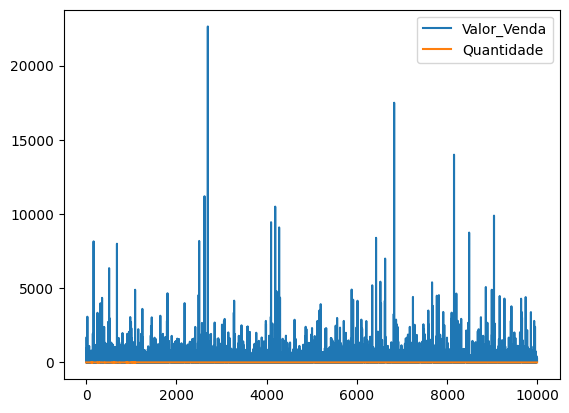

In [85]:
dsa_df.plot()

<Axes: xlabel='Valor_Venda', ylabel='Quantidade'>

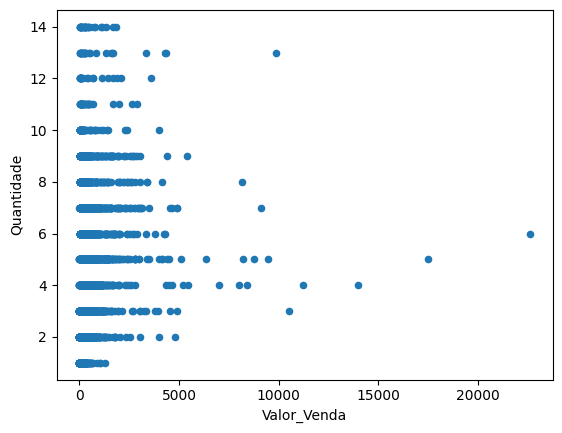

In [95]:
dsa_df.plot.scatter(x ='Valor_Venda', y='Quantidade')

<Axes: >

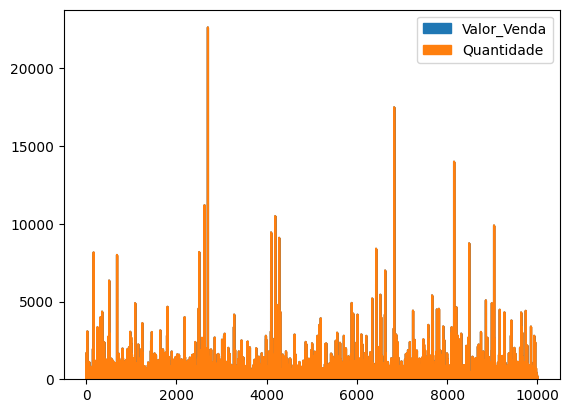

In [96]:
dsa_df.plot.area()

In [103]:
# Calculando a média de colunas agrupadas e criando um gráfico de barras com o resultado


dsa_df.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Regiao',
       'ID_Produto', 'Categoria', 'Nome_Produto', 'Valor_Venda', 'Quantidade',
       'Ano', 'Pedido_Segmento'],
      dtype='object')

<Axes: xlabel='Segmento'>

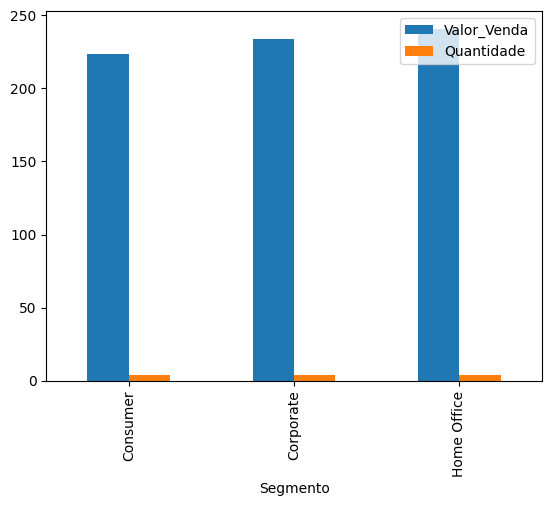

In [111]:
dsa_df[['Segmento','Valor_Venda','Quantidade']].groupby(['Segmento']).mean().plot.bar()

<Axes: ylabel='Valor_Venda'>

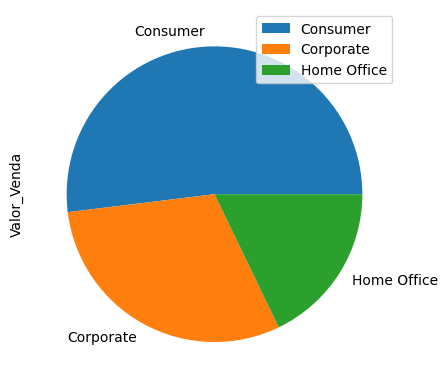

In [117]:
# Mesmo esquema, mas fazendo contagem
# Essa é a única vez que você vai me ver usando gráfico de pizza

dsa_df[['Segmento','Valor_Venda','Quantidade']].groupby(['Segmento']).count().plot.pie(y = 'Valor_Venda')